<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** Core of a neural networks which takes the inputs, multiplies them by weights, and performs sum on the calculation processed by data to yield the output
- **Input Layer:** Receives data and feeds into the model
- **Hidden Layer:** Receives signals from input layers and processes them into the output layer given weights and biases
- **Output Layer:** Receives signals from hidden layers and yield the resulting classification or prediction values
- **Activation Function:** Defines the output of the neuron with provided input. It's used to perform the calculation

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

# It's a system of neural networks in which a specific process is being supervised and adjusted to minimize the loss or fault of the neural networks



Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

# Your Answer Here - Change the Cell to Markdown
Architecture: Firstly, input layers are builts. The input layer neurons should be the same as features in terms of quantity, minus the target feature. Since this is a simple perceptron class, hidden layers will not present in the networks, hence output layers with one neuron will be the next ones. Next, weights will be initialized to a random number. Finally, the activation function will be implemented and applied to the output layer.

Feed-foward: As the architecture is built, training data will be fed thoughout the network. The process will create some error values, representing the difference between network's output and expected output

Back propagation: The error value is then processed by the activation function derivative. The derivative function adjusts the weights with respect to the error

More train: The feed-forward and back propagation(or epoch) processes are repeated multiple times until the output of the loss function no longer shows significant changes. Weights are then calibrated for a prediction

Test: The second to last step is to push a hold out test set with yielded outputs through network one time to determine the accuracy of the network.

Prediction: Lastly, as the model's accuracy is acceptable, given data will be passed into the model for a prediction.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [2]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [3]:
#Essential packages
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split

#Tensorflow packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [4]:
model1 = Sequential()
model1.add(Dense(2, input_dim=2, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X,y, epochs=50)

Train on 300 samples
Epoch 1/50
300/300 [==============================] - 0s 1ms/sample - loss: 0.3137 - accuracy: 0.4733
Epoch 2/50
300/300 [==============================] - 0s 43us/sample - loss: 0.3112 - accuracy: 0.4733
Epoch 3/50
300/300 [==============================] - 0s 47us/sample - loss: 0.3089 - accuracy: 0.4733
Epoch 4/50
300/300 [==============================] - 0s 53us/sample - loss: 0.3066 - accuracy: 0.4733
Epoch 5/50
300/300 [==============================] - 0s 43us/sample - loss: 0.3042 - accuracy: 0.4733
Epoch 6/50
300/300 [==============================] - 0s 53us/sample - loss: 0.3020 - accuracy: 0.4733
Epoch 7/50
300/300 [==============================] - 0s 50us/sample - loss: 0.2999 - accuracy: 0.4733
Epoch 8/50
300/300 [==============================] - 0s 50us/sample - loss: 0.2978 - accuracy: 0.4733
Epoch 9/50
300/300 [==============================] - 0s 47us/sample - loss: 0.2957 - accuracy: 0.4733
Epoch 10/50
300/300 [==============================] 

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [5]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [6]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='selu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='mse', optimizer='nadam', metrics=['accuracy'])
h2 = model2.fit(X,y, epochs=50)

Train on 300 samples
Epoch 1/50
300/300 [==============================] - 1s 3ms/sample - loss: 0.2438 - accuracy: 0.6000
Epoch 2/50
300/300 [==============================] - 0s 50us/sample - loss: 0.2271 - accuracy: 0.7300
Epoch 3/50
300/300 [==============================] - 0s 66us/sample - loss: 0.2116 - accuracy: 0.7367
Epoch 4/50
300/300 [==============================] - 0s 57us/sample - loss: 0.1964 - accuracy: 0.7600
Epoch 5/50
300/300 [==============================] - 0s 57us/sample - loss: 0.1821 - accuracy: 0.8333
Epoch 6/50
300/300 [==============================] - 0s 59us/sample - loss: 0.1685 - accuracy: 0.9000
Epoch 7/50
300/300 [==============================] - 0s 57us/sample - loss: 0.1559 - accuracy: 0.9233
Epoch 8/50
300/300 [==============================] - 0s 50us/sample - loss: 0.1435 - accuracy: 0.9333
Epoch 9/50
300/300 [==============================] - 0s 56us/sample - loss: 0.1321 - accuracy: 0.9567
Epoch 10/50
300/300 [==============================] 

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [14]:
!pip install upgrade mlxtend

  ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade



Bad key "text.kerning_factor" on line 4 in
C:\Users\Predator\Anaconda3\envs\U4-S1-NLP\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


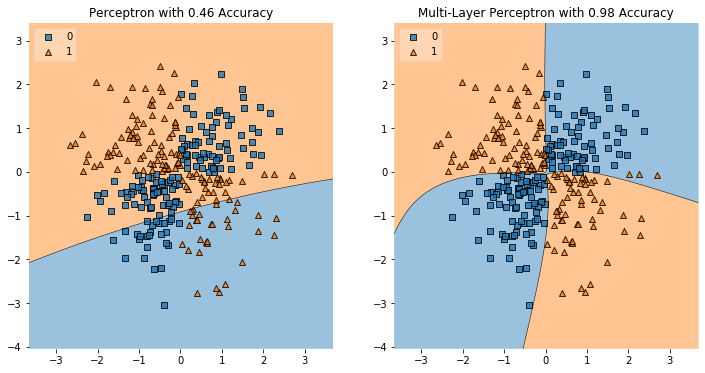

In [7]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

# Your Answer Here - Change the Cell to Markdown
Perceptron's are only single layered networks. The MLP's hidden layers allow it to add non-linearity to the input data that is magnitudes different than a single layered perceptron. Each layer can 'learn' different aspects of the data set that is impossible to do in a single layer.

If we were to take the MNIST data set as an example. The first hidden layer may generalize the edges of the numbers in the first layer, corners and loops in the second, and digit fragments in the third. These generalizations simply cannot be done in a single layer perceptron. Thus it stands to reason that the more complex or noisy the images in a dataset are, the more useful it is to have additional hidden layers to help generalize the different attributes of the images independently.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [8]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [10]:
# Your Code Here
#Initialize X_train, y_train, X_test, y_test
#Create features and target columns
feats= list(df)[:-1]
target= list(df)[-1]

#Initialize X, y
X = df[feats].values
y = df[target].values

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the shape of newly created sets
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [11]:
#Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 1.42749948 -1.47790748  1.06904497 ... -0.61986954 -0.69631062
   1.09108945]
 [ 0.6526888  -1.47790748  2.04900285 ...  1.01065685 -0.69631062
  -0.50917508]
 [ 0.20993985  0.67663234 -0.89087081 ... -0.61986954  0.26111648
  -0.50917508]
 ...
 [ 1.206125    0.67663234 -0.89087081 ... -0.61986954  0.26111648
   1.09108945]
 [-0.23280911  0.67663234 -0.89087081 ...  1.01065685  2.1759707
   1.09108945]
 [ 0.32062709 -1.47790748 -0.89087081 ... -0.61986954 -0.69631062
   1.09108945]]
[[ 0.54200157  0.67663234  2.04900285  0.22457514 -0.78579859 -0.41119597
   0.94475611  0.54799951 -0.70929937 -0.21738548  1.01065685  1.21854359
  -0.50917508]
 [-0.34349635  0.67663234 -0.89087081  0.57901329  0.29435146 -0.41119597
  -0.99279455  1.60190056  1.40984195 -0.91417074  1.01065685 -0.69631062
  -0.50917508]
 [ 0.54200157  0.67663234 -0.89087081  0.57901329 -1.29744861 -0.41119597
   0.94475611  0.54799951  1.40984195 -0.91417074  1.01065685  0.26111648
   1.09108945]
 [-0.34349635  0.676

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
#Build a model

inputs = X_train.shape[1]
epochs = 200
batch_size = 10
stop = EarlyStopping(monitor='val_mae', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(64, activation='selu', input_shape=(inputs,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])

model.compile(loss='mse', optimizer='adamax', metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[tensorboard_callback, stop])

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 2ms/sample - loss: 0.4628 - mse: 0.4628 - mae: 0.4628 - val_loss: 0.4262 - val_mse: 0.4262 - val_mae: 0.4262
Epoch 2/200
242/242 [==============================] - 0s 386us/sample - loss: 0.4628 - mse: 0.4628 - mae: 0.4628 - val_loss: 0.4262 - val_mse: 0.4262 - val_mae: 0.4262
Epoch 3/200
242/242 [==============================] - 0s 353us/sample - loss: 0.4628 - mse: 0.4628 - mae: 0.4628 - val_loss: 0.4262 - val_mse: 0.4262 - val_mae: 0.4262
Epoch 4/200
242/242 [==============================] - 0s 375us/sample - loss: 0.4628 - mse: 0.4628 - mae: 0.4628 - val_loss: 0.4262 - val_mse: 0.4262 - val_mae: 0.4262


In [31]:
#Hyperparameter tune with GridsearchCV
#First tune learning rate
from tensorflow.keras.optimizers import Adamax, Adam, Nadam, Adadelta, Adagrad
inputs = X_train.shape[1]

def model1(learn_rate=0.01):
    model = Sequential([
        Flatten(),
        Dense(64, activation='selu', input_shape=(inputs,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='tanh')
    ])
    model.compile(loss='squared_hinge', optimizer=Nadam(lr=learn_rate), metrics=['accuracy', 'mse'])
    return model

#Initialize model
model1 = KerasClassifier(build_fn = model1, verbose=0)
lr = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(learn_rate=lr)

#GridSearchCV
grid = GridSearchCV(estimator = model1, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X_train, y_train)

#Print out report
print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Mean :{mean}, Stdev:{stds}, with:{param}')

Best 0.7727880676587423 using {'learn_rate': 0.01}
Mean :0.7727880676587423, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.01}
Mean :0.5619855920473734, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.1}
Mean :0.6947530806064606, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.2}
Mean :0.48379628856976825, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.3}
Mean :0.4421296219031016, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.4}
Mean :0.46270575126012164, Stdev:[0.02268619 0.0151247  0.16016963 0.05919104 0.02042447 0.04873682], with:{'learn_rate': 0.5}


In [37]:
#Second tune activation
def model2(activation='relu'):
    model = Sequential([
        Flatten(),
        Dense(64, activation = activation, kernel_initializer='uniform', input_shape=(inputs,)),
        Dense(128, activation = 'selu'),
        Dense(128, activation = 'selu'),
        Dense(1, activation = 'sigmoid', kernel_initializer='uniform')
    ])
    model.compile(loss = 'squared_hinge', optimizer='nadam', metrics=['accuracy', 'mse'])
    return model

seed = 10
np.random.seed(seed)

#Initialize model
model2 = KerasClassifier(build_fn=model2, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

#GridSearchCV
grid = GridSearchCV(estimator=model2, param_grid = param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

#Print out report
print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Mean :{mean}, Stdev:{stds}, with:{param}')

Best 0.7894547382990519 using {'activation': 'tanh'}
Mean :0.46270575126012164, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'softmax'}
Mean :0.46270575126012164, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'softplus'}
Mean :0.7767489751180013, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'softsign'}
Mean :0.5209876596927643, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'relu'}
Mean :0.7894547382990519, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'tanh'}
Mean :0.46270575126012164, Stdev:[0.04873682 0.04873682 0.02764409 0.06890025 0.03543703 0.04873682
 0.04873682 0.04928751], with:{'activation': 'sigmoid'}
Mean :0.4627057512

In [43]:
#Third tune number of neuron

def model3(neurons=1):
    model = Sequential([
        Flatten(),
        Dense(64, activation = 'relu', kernel_initializer='uniform', input_shape=(inputs,)),
        Dense(128, activation = 'selu'),
        Dense(128, activation = 'selu'),
        Dense(1, activation = 'sigmoid', kernel_initializer='uniform')
    ])
    model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy', 'mse'])
    return model

seed = 10
np.random.seed(seed)

#Initialize model
model3 = KerasClassifier(build_fn=model3, verbose=0)
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)

#GridSearchCV
grid = GridSearchCV(estimator=model3, param_grid = param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

#Print out report
print(f'Best {(grid_result.best_score_)*100}% using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Mean :{mean}, Stdev:{stds}, with:{param}')

Best 80.58127562204996% using {'neurons': 5}
Mean :0.7893518606821696, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 1}
Mean :0.8058127562204996, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 5}
Mean :0.7770061691602071, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 10}
Mean :0.7976851662000021, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 15}
Mean :0.7685699661572775, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 20}
Mean :0.7810699741045634, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 25}
Mean :0.7358024716377258, Stdev:[0.02596844 0.02070752 0.02930069 0.04131712 0.01571769 0.014303
 0.10144513], with:{'neurons': 30}


**My best score is 80.58%**